# Decision Trees in Machine Learning

Decision trees are a popular and intuitive method for both classification and regression tasks in machine learning. They work by splitting the data into subsets based on the value of input features, creating a tree-like model of decisions. They are super powerful, mostly due to the ease of analyzing the thinking behind the model. In deep neural networks, the model makes tons of decisions that are too complicated to pick out, but in Decision Trees, you can plot the tree and uncover the features that cause the predictions.

## Key Concepts

1. **Root Node**: The top node of the tree that represents the entire dataset. It is split into two or more homogeneous sets. *(In this example, our model always splits by gender from the root node)*
2. **Decision Nodes**: Nodes that represent a decision point, where the data is further split based on a feature.
3. **Leaf Nodes**: Terminal nodes that represent the final output or decision. They do not split further.
4. **Splitting**: Dividing a node into two or more sub-nodes based on a feature.
5. **Pruning**: Removing sub-nodes to prevent overfitting and improve the model's generalization.

![Decision Tree Diagram](dtree-diagram.png)

(From KDNuggets.org)


## Advantages

- **Easy to understand and interpret.**
  - When you use a decision tree, you can trace it back to figure out why the model made the decisions it did
- Requires little data preprocessing.
- Can handle both numerical and categorical data.
- Non-parametric, so no assumptions about the data distribution are needed.

## Disadvantages

- **Prone to overfitting**, especially with deep trees.
- Can be unstable, as small changes in data might lead to a completely different tree.
- Biased towards features with more levels.

# Importing Our Data

In this notebook, we will use data regarding survival rates in the Titanic disaster. Let's turn it into a dataframe so we can perform matrix operations with ease. We've got to clean it up a little, too.

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic.csv', delimiter=',')

## Check the column names in the dataset
# print(df.columns)

# Drop rows with missing data
df_cleaned = df.dropna()

# Drop the specified columns
df_cleaned = df_cleaned.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])

# print(df_cleaned.head())

# Convert 'Sex' column to numerical values
df_cleaned['Sex'] = df_cleaned['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Convert 'Embarked' column to numerical values
df_cleaned['Embarked'] = df_cleaned['Embarked'].apply(lambda x: 1 if x == 'C' else 0)

df_cleaned[:20]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,1
3,1,1,0,35.0,1,0,53.1000,0
6,0,1,1,54.0,0,0,51.8625,0
10,1,3,0,4.0,1,1,16.7000,0
11,1,1,0,58.0,0,0,26.5500,0
21,1,2,1,34.0,0,0,13.0000,0
23,1,1,1,28.0,0,0,35.5000,0
27,0,1,1,19.0,3,2,263.0000,0
52,1,1,0,49.0,1,0,76.7292,1
54,0,1,1,65.0,0,1,61.9792,1


Great, our data is in a Dataframe and is clean. 

We are going to try and predict whether the individuals survived the titanic crash using the features that are left. Seems like a fun experiment

## Graphing The Data

Let's graph our data to see what trends we can pick out. We will graph the features 'Sex' vs 'Age' for simplicity in 2 dimensions.

Pclass
1    67.088608
2    80.000000
3    50.000000
Name: Survived, dtype: float64
<class 'pandas.core.indexes.base.Index'>
67.08860759493672
80.0
50.0


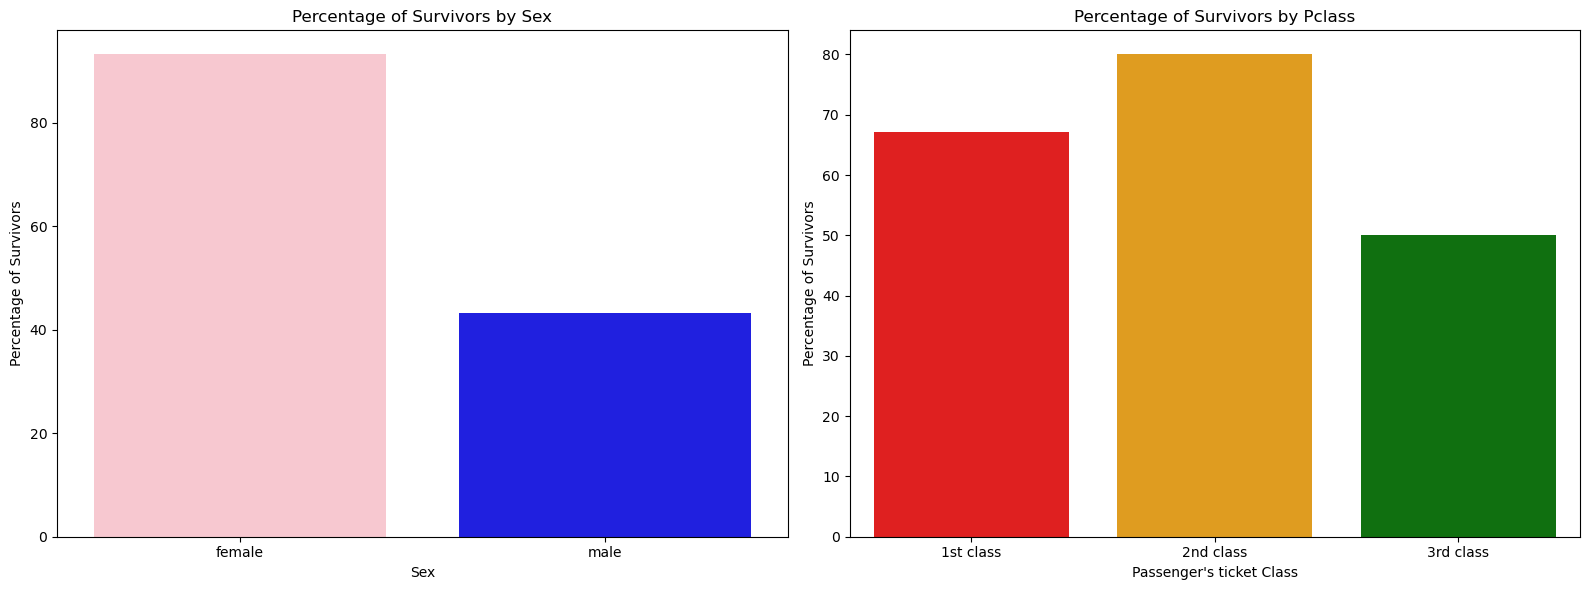

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of survivors for 'Sex'
sex_survival_rate = df_cleaned.groupby('Sex')['Survived'].mean() * 100

# Calculate the percentage of survivors for 'Pclass'
pclass_survival_rate = df_cleaned.groupby('Pclass')['Survived'].mean() * 100
print(pclass_survival_rate)
print(type(pclass_survival_rate.index))
print(pclass_survival_rate.values[0])
print(pclass_survival_rate.values[1])
print(pclass_survival_rate.values[2])


# Create the bar plot for 'Sex'
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=sex_survival_rate.index, y=sex_survival_rate.values, palette={1: 'blue', 0: 'pink'})
plt.xlabel('Sex')
plt.ylabel('Percentage of Survivors')
plt.title('Percentage of Survivors by Sex')
plt.xticks(ticks=[0, 1], labels=['female', 'male'])

# Create the bar plot for 'Pclass'
plt.subplot(1, 2, 2)
sns.barplot(x=pclass_survival_rate.index, y=pclass_survival_rate.values, palette={1: 'red', 2: 'orange', 3: 'green'})
plt.xlabel('Passenger\'s ticket Class')
plt.ylabel('Percentage of Survivors')
plt.title('Percentage of Survivors by Pclass')
plt.xticks(ticks=[0, 1, 2], labels=['1st class', '2nd class', '3rd class'])

# Show the plots
plt.tight_layout()
plt.show()

Wow, it looks like women were typically much more likely to survive than men. Also, the higher ticket classes tended to have more survivors. 

## Decision Tree

Now, we will implement this into a decision tree. We will use Sklearn for this; they have a built-in decision tree classifier.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(columns=['Survived']), df_cleaned['Survived'], test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7567567567567568


## Plotting the Tree

Cool, looks like our model is moderately accurate, all things considered. Let's visualize the tree. 

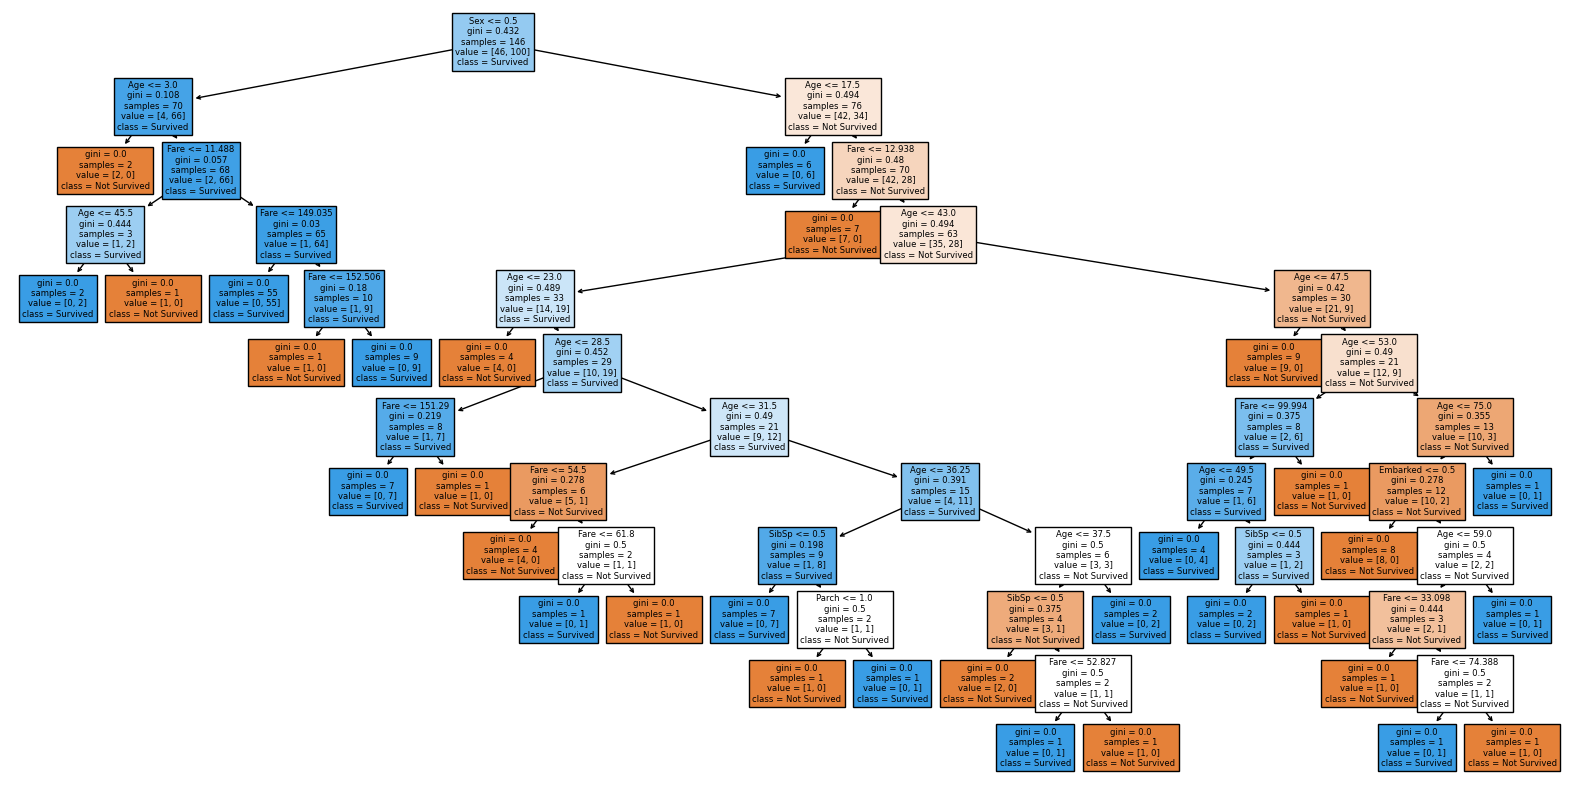

|--- Sex <= 0.50
|   |--- Age <= 3.00
|   |   |--- class: 0
|   |--- Age >  3.00
|   |   |--- Fare <= 11.49
|   |   |   |--- Age <= 45.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  45.50
|   |   |   |   |--- class: 0
|   |   |--- Fare >  11.49
|   |   |   |--- Fare <= 149.04
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  149.04
|   |   |   |   |--- Fare <= 152.51
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  152.51
|   |   |   |   |   |--- class: 1
|--- Sex >  0.50
|   |--- Age <= 17.50
|   |   |--- class: 1
|   |--- Age >  17.50
|   |   |--- Fare <= 12.94
|   |   |   |--- class: 0
|   |   |--- Fare >  12.94
|   |   |   |--- Age <= 43.00
|   |   |   |   |--- Age <= 23.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  23.00
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Fare <= 151.29
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  151.29
|   |   |   |   |   |   |   |--- class: 0
|   | 

In [34]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

tree_text = export_text(clf, feature_names=list(X_train.columns))
print(tree_text)

# Analysis of the Decision Tree

Wow, there's a lot to unpack here. Let's analyze some of the important takaways.

## Structure of the Decision Tree

### Root Node:
- The first decision differentiates based on gender; The tree starts by splitting on the `Sex` feature at `Sex <= 0.50` (`0 = female`, `1 = male`).

### Female Path (`Sex <= 0.50`):
- If `Age <= 3.00`, the outcome is `class: 0` (not survived).
- Otherwise, it further splits by `Fare`:
  - Low fares (`Fare <= 11.49`) and younger ages (`Age <= 45.50`) tend to survive (`class: 1`).
  - Higher fares (`Fare > 11.49`) generally lead to survival, but extremely high fares (`Fare > 149.04` and `Fare <= 152.51`) result in non-survival for some cases *This is probably overfitting!*

### Male Path (`Sex > 0.50`):
- Young males (`Age <= 17.50`) tend to survive (`class: 1`).
- Older males split on `Fare` and `Age`:
  - Low fares (`Fare <= 12.94`) predict death (`class: 0`).
  - For higher fares, survival depends on various age ranges:
    - Ages 23–28.5 with low `Parch` values (≤1) tend to survive (`class: 1`).
    - Older males with high fares sometimes survive depending on specific age and family conditions *This also may be overfit.*

## Experiment: Check For Overfitting

I have a hypothesis: Our model is likely overfitting, which means it has too high of a depth. In the analyis of the tree, we noted:
- "Older maled with high fares sometimes survive depending on speicific age and family conditions" 
- Extremely high fares lead to death while mildly high fares lead to survival.

Let's make the decision tree over again, but this time with less depth. We'll set the maximum depth to 3.  

Accuracy with pruned tree: 0.8108108108108109


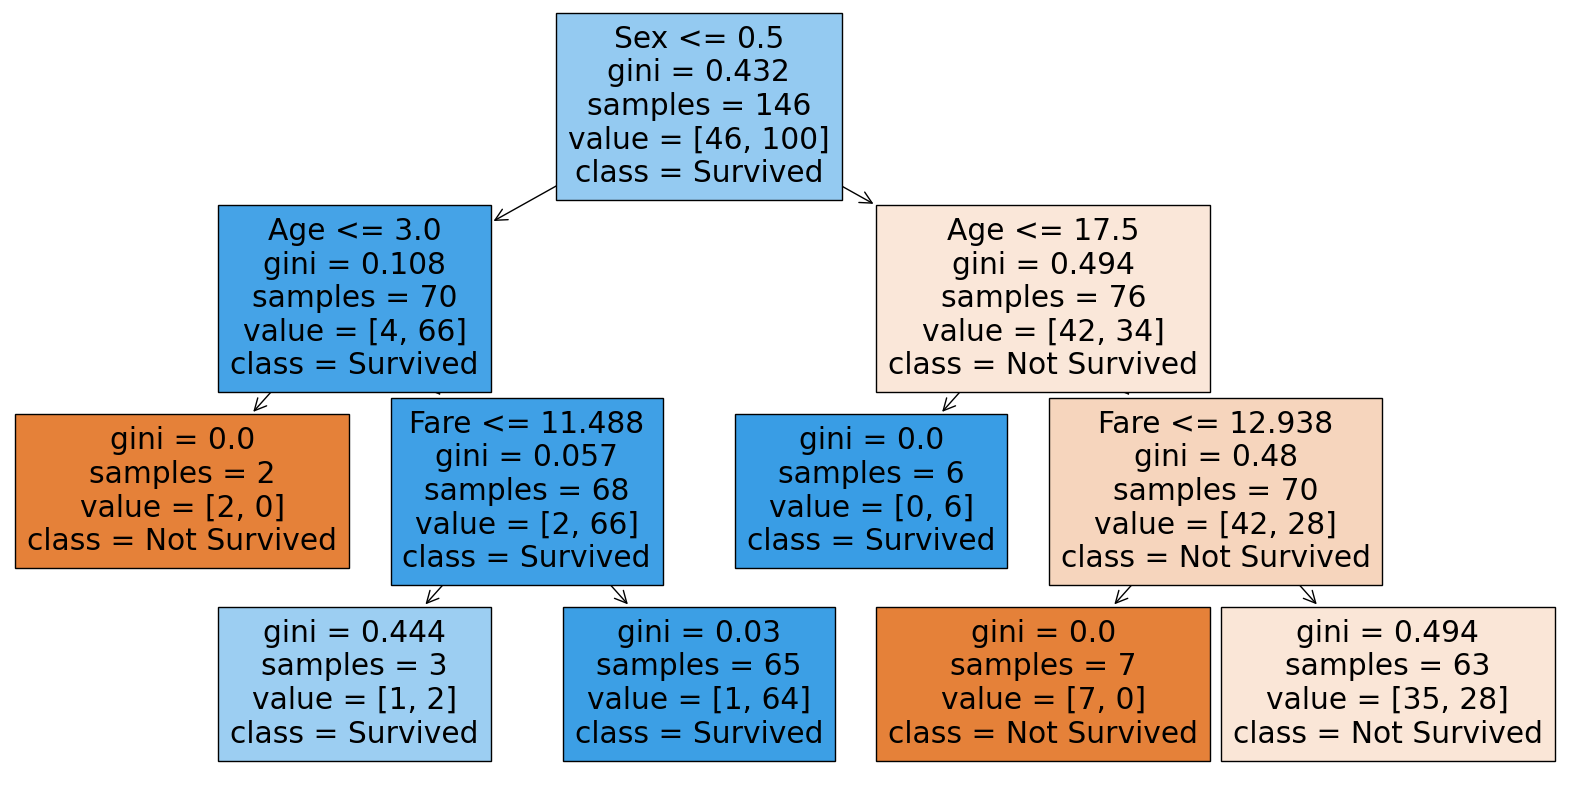

|--- Sex <= 0.50
|   |--- Age <= 3.00
|   |   |--- class: 0
|   |--- Age >  3.00
|   |   |--- Fare <= 11.49
|   |   |   |--- class: 1
|   |   |--- Fare >  11.49
|   |   |   |--- class: 1
|--- Sex >  0.50
|   |--- Age <= 17.50
|   |   |--- class: 1
|   |--- Age >  17.50
|   |   |--- Fare <= 12.94
|   |   |   |--- class: 0
|   |   |--- Fare >  12.94
|   |   |   |--- class: 0



In [35]:
# Initialize the Decision Tree Classifier with max_depth
clf_pruned = DecisionTreeClassifier(max_depth=3)

# Train the classifier
clf_pruned.fit(X_train, y_train)

# Make predictions
y_pred_pruned = clf_pruned.predict(X_test)

# Calculate the accuracy
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Accuracy with pruned tree: {accuracy_pruned}')

# Visualize the pruned tree
plt.figure(figsize=(20,10))
plot_tree(clf_pruned, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

tree_text_pruned = export_text(clf_pruned, feature_names=list(X_train.columns))
print(tree_text_pruned)

## Analysis Of Shallower Tree

This tree has higher accuracy! And that accuracy is seriously good for predicting something as variable as survival on such few features (I can't imagine it getting much better!)

### What We Learned

- Women tended to be more likely to survive on the titanic
- Babies and todlers tended to be more likely to survive on the titanic
- Considering other variables (like ticket class and fare) tend to lead to overfit which indicates they are much worse predictions of survival than gender and age.

# Regression Tree

Now, we will use a regression tree to predict what age a person was based on the other features. This is exactly the same idea as a decision tree (*ALMOST*) but we are trying to predict a continuous value rather than classifying based on a label. Since age is a continuous value, we can use a regression tree.

### Distribution of Ages

Let's plot the distribution of ages based on their frequency, to get an idea of the age distribution of titanic passangers:

/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_35312/3649162007.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_35312/3649162007.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


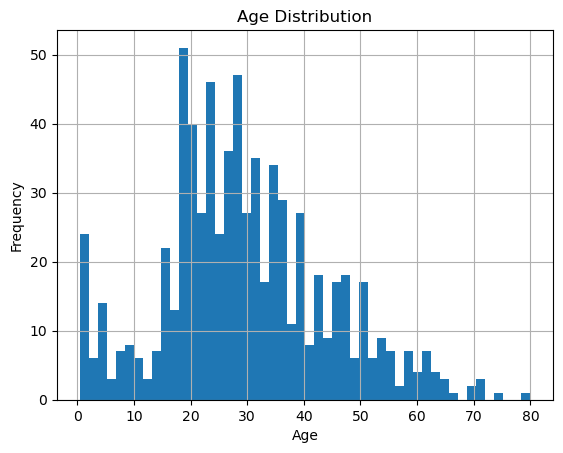

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Select target and features
target = 'Age'  # For predicting ticket price
features = ['Pclass', 'Fare', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']

# print(df['Age'])
# Prepare the data
df_cleaned = df.dropna(subset=features + [target])
X = df_cleaned[features]
y = df_cleaned[target]

# Convert categorical variables (e.g., Sex, Embarked) to numerical
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})



df['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()



In [37]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression tree
reg_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_tree.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 177.79213765132081


Well, our model performed relatively well. A mean squared error of 177.79 comes out to around a 13-year average error across the predictions. This is just alright. Let's try predicting a different feature using our decision tree:

In [38]:
# Select target and features
target = 'Fare'  # For predicting ticket price
features = ['Pclass', 'Cabin', 'Age', 'Sex', 'Survived']


df_cleaned = df.dropna(subset=features + [target])

print(df_cleaned)
X = df_cleaned[features]
y = df_cleaned[target]

# Convert categorical variables (e.g., Sex, Cabin) to numerical
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Cabin'] = X['Cabin'].str[0]  # Get the first letter of the cabin
deck_mapping = {deck: idx for idx, deck in enumerate(X['Cabin'].unique())}
X['Cabin'] = X['Cabin'].map(deck_mapping)

# print(X['Cabin'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression tree
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_tree.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_35312/265635131.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_35312/265635131.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cabin'] = X['Cabin'].str[0]  # Get the first letter of the cabin
/var/folders/y2/tsyh3wpj3mj7zcv4hfd0knl40000gn/T/ipykernel_35312/265635131.py:16: SettingWithCopyWarning: 
A value is trying to be set on 

### Results

Using a regression tree for our model doesn't do a great job. Actually, this shouldn't be surprising. Here's why:

We determined before that age and gender are the most important features in determining survival. We found that the fare had very little to do with the results. It is arguable that the regression tree for predicting the age did a better job than the one predicting the fare. The feature that is bound to have the most correlation with 'Fare' is 'pclass', the class of their ticket. 

When we run a decision tree solely on this, we find a much lower MSE (*shown below*)

In [39]:
target = 'Fare'  # For predicting ticket price
features = ['Pclass']

df_cleaned = df.dropna(subset=features + [target])
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression tree
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_tree.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1065.8820318586818
